<h1><center> Lending Club Case Study </center></h1>

# Problem Statement

An consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://static.seekingalpha.com/uploads/2018/7/24/611070-15324425486052382_origin.jpg", width = 1000)

In [22]:
Image(url= "https://static1.seekingalpha.com/uploads/2019/5/30/7510721-15592751779598007.png", width = 1000)

# Data Understanding

In [81]:
# Import Necessary Packages
import numpy as np
import pandas as pd
import qgrid
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# Utility Functions

def fix_plot_size():
    return plt.figure(figsize = (15,8))

In [3]:
loan_df = pd.read_csv('loan.csv')

In [25]:
loan_df.shape

(39717, 111)

In [39]:
qgrid.show_grid(loan_df, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100}, show_toolbar = True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [29]:
list(loan_df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Observations :

1. Some of the columns have constant data or just NaN's

In [30]:
qgrid.show_grid(pd.DataFrame(loan_df.apply(pd.Series.nunique)).reset_index(), show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

2. Some of the data types are not appropriate i.e id, member_id is int, should be category/object.

In [31]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Processing

In [4]:
# Removing Constant Columns or columns with just NaN's

loan_df = loan_df.loc[:,loan_df.apply(pd.Series.nunique) > 1]

## Data Type Cleaning each column

In [5]:
### id and member_id

loan_df['id'] = loan_df['id'].astype('object')
loan_df['member_id'] = loan_df['member_id'].astype('object')

In [6]:
### Term

loan_df['term_in_months'] = loan_df['term'].apply(lambda x: x.replace(' months','')).astype(int)
loan_df.drop('term', axis = 1, inplace = True)

In [7]:
### int_rate

loan_df['int_rate_in_pct'] = loan_df['int_rate'].apply(lambda x: x.replace('%','')).astype(float)
loan_df.drop('int_rate', axis = 1, inplace = True)

In [8]:
# Issue_d

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y', yearfirst=False)

In [9]:
# zipcode

loan_df['zip_code'] = loan_df['zip_code'].str.replace('xx','')

In [10]:
# earliest_cr_line

loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y', yearfirst=False)

In [11]:
# revol_util

loan_df['revol_util_in_pct'] = loan_df['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)
loan_df.drop('revol_util', axis = 1, inplace = True)

In [12]:
# last_pymnt_d

loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y', yearfirst=False)

In [13]:
# next_pymnt_d

loan_df['next_pymnt_d'] = pd.to_datetime(loan_df['next_pymnt_d'], format='%b-%y', yearfirst=False)

In [14]:
# last_credit_pull_d

loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y', yearfirst=False)

# Data Description

In [15]:
qgrid.show_grid(loan_df.describe(include='all'),  grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Observations : 

- Annual Income is right tailed and has a lot of outliers.
- id, member_id, url is a unique column

# Univariate Analysis

## Loan Status

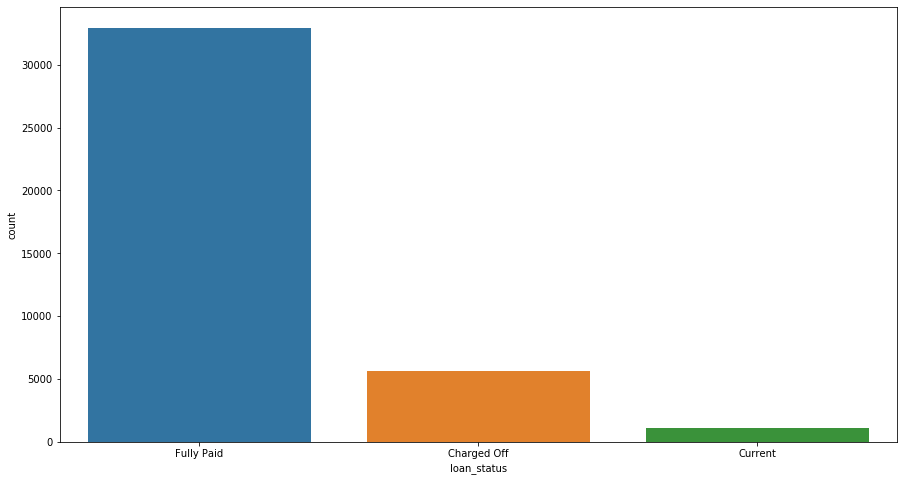

In [72]:
fix_plot_size()
sns.countplot(loan_df['loan_status'])

Observations : 

- Fully Paid is about 82% of the data and Charged Off is 14 %.

## How Much, Who and Why are the loans being taken ?

### How much amount is applied by the borrower ?

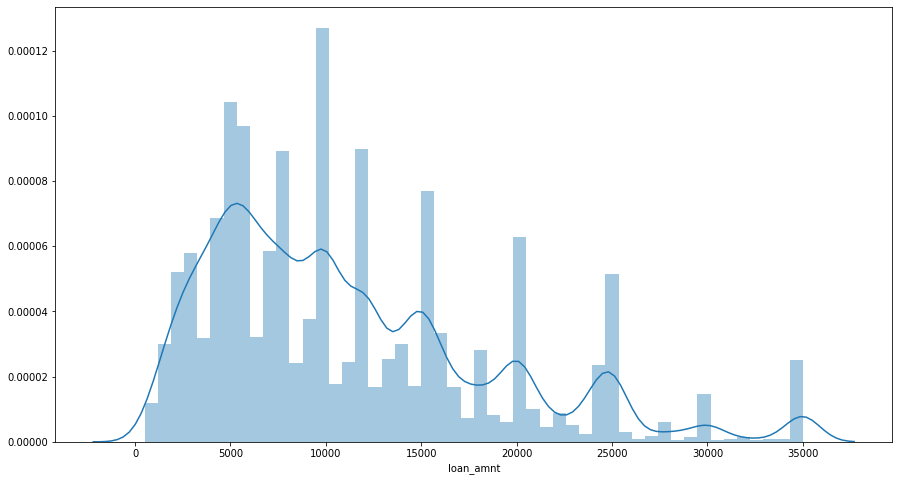

In [76]:
fix_plot_size()
sns.distplot(loan_df['loan_amnt'])

Mean of the loan amount is about 5000 and seems to be a right tailed distribution

### How much amount is funded by the lender ?

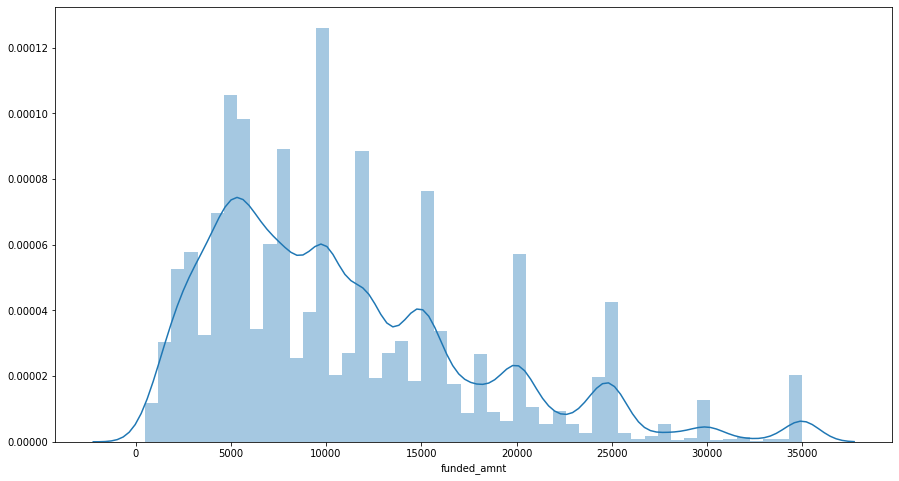

In [77]:
fix_plot_size()
sns.distplot(loan_df['funded_amnt'])

Mean of the amount funded by lender is about 5000 and seems to be a right tailed distribution

### How much amount is committed by investors ?

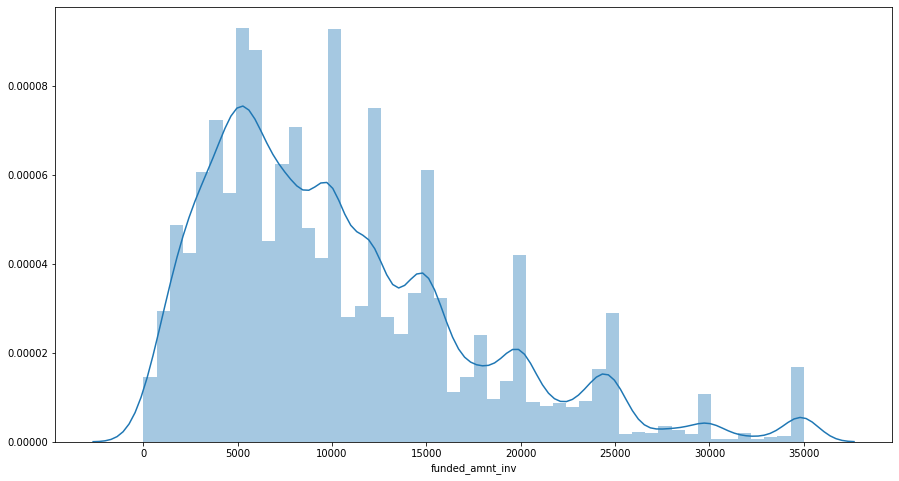

In [78]:
fix_plot_size()
sns.distplot(loan_df['funded_amnt_inv'])

Mean of the amount given by investors is about 5000 and seems to be a right tailed distribution

### What is the average of number of installments applied by borrower ?

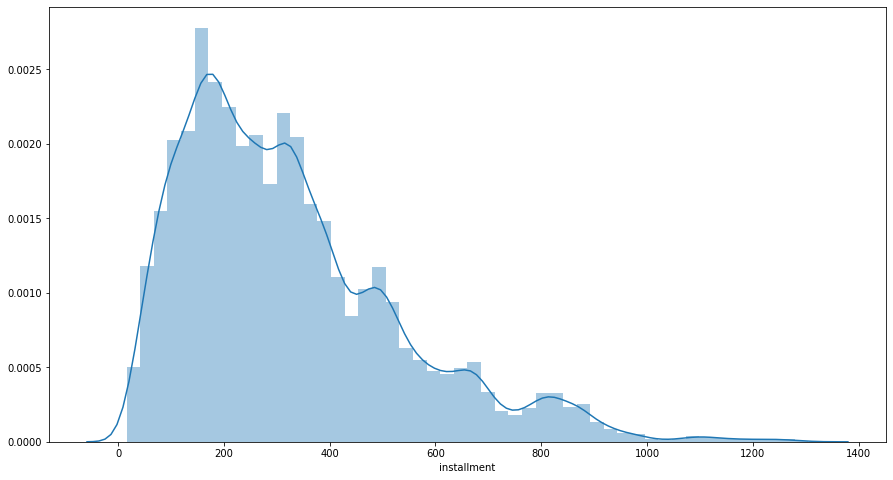

In [99]:
fix_plot_size()
sns.distplot(loan_df['installment'])

Mean of the number of installments is about 200 and seems to be a right tailed distribution. The highest is 1400 installments.

### What is the status of their home ownership among the loan borrowers ?

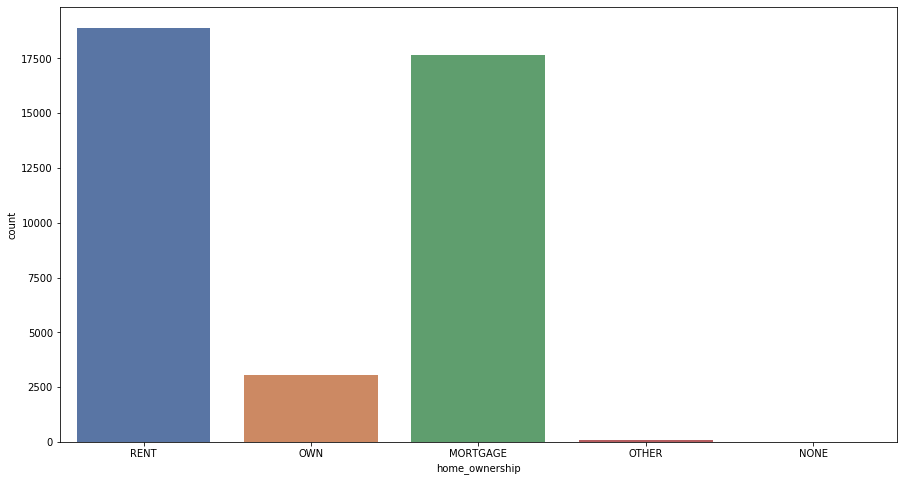

In [102]:
fix_plot_size()
sns.countplot(loan_df['home_ownership'],palette="deep")

### What is the average annual income among the loan borrowers ?

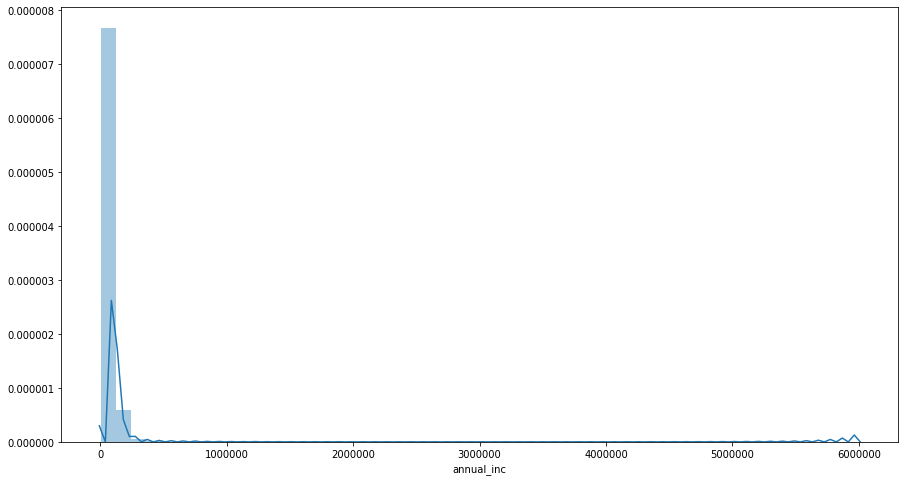

In [103]:
fix_plot_size()
sns.distplot(loan_df['annual_inc'])

Annual income among the borrowers are skewed towards right. Seems to have alot of outliers

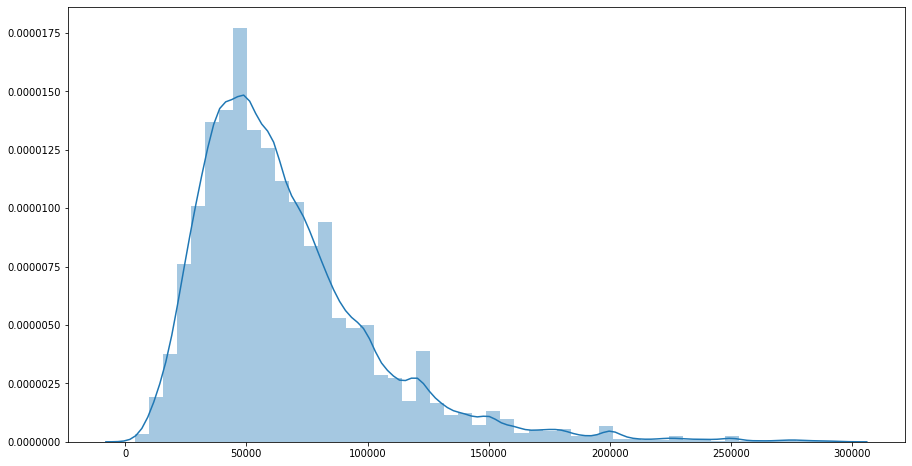

In [106]:
fix_plot_size()
sns.distplot(loan_df[['annual_inc']].query('annual_inc < 300000'))

Average Annual Income of the borrowers are about 50000 after removing outliers.

### How many loans has the lending comapany issued over months/years ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

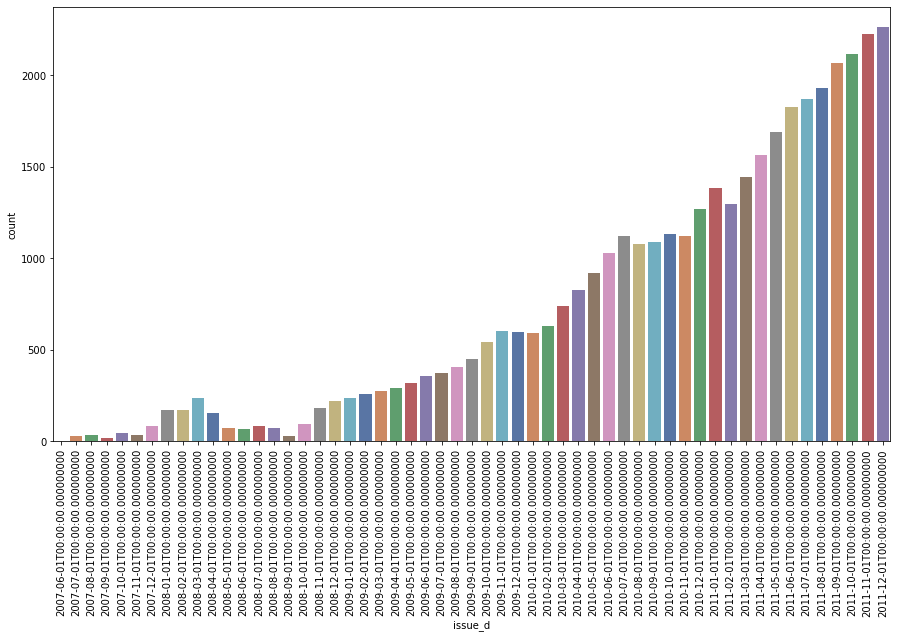

In [112]:
fix_plot_size()
sns.countplot(loan_df['issue_d'],palette="deep")
plt.xticks(rotation = 90)

Number of Loans being issued is increasing across date by months.

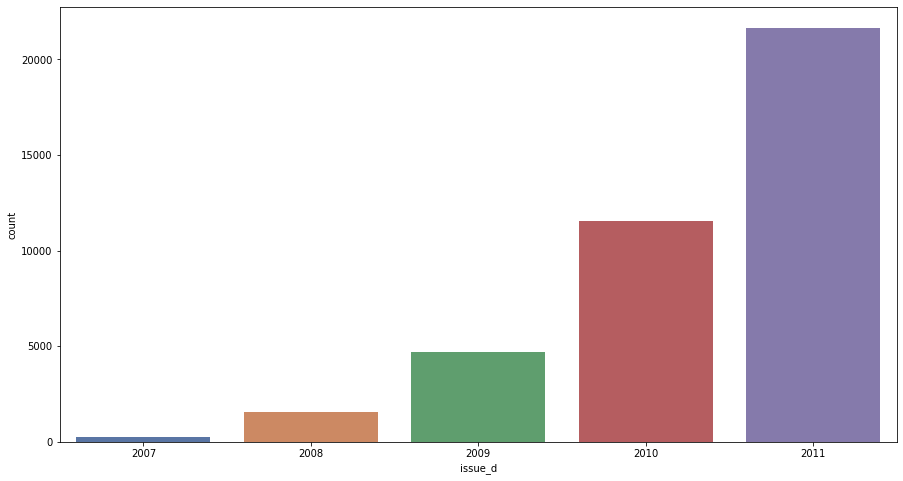

In [110]:
fix_plot_size()
sns.countplot(loan_df['issue_d'].dt.year,palette="deep")

Number of Loans being issued is increasing across date by years.

### Why are the loans being borrowed ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

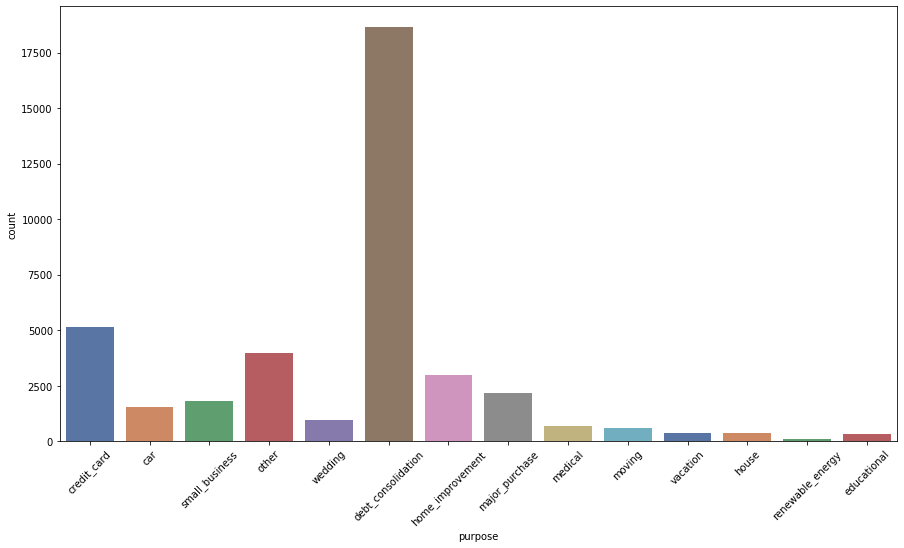

In [116]:
fix_plot_size()
sns.countplot(loan_df['purpose'],palette="deep")
plt.xticks(rotation = 45)

Majority of loans are being borrowed for debt consolidation, credit-card payments, home improvements.

### Where are the loans being borrowed

In [20]:
df = pd.DataFrame(loan_df.groupby('addr_state').addr_state.count()).rename({'addr_state':'freq'}, axis = 1).reset_index()

In [70]:
df.head()

,addr_state,freq,lat,lon,text
0,AK,80,46.98,-97.39,AK<br>Number of Loans 80
1,AL,452,33.22,-86.79,AL<br>Number of Loans 452
2,AR,245,40.90,-77.30,AR<br>Number of Loans 245
3,AZ,879,39.91,-94.93,AZ<br>Number of Loans 879
4,CA,7099,38.20,-121.20,CA<br>Number of Loans 7099


In [133]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['addr_state'], # Spatial coordinates
    z = df['freq'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of Loans",
))

fig.update_layout(
    title_text = 'Loans being Borrowed from Lending Club',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

Majority of loans are being issued in California

### How are the different attributes correaletd ?

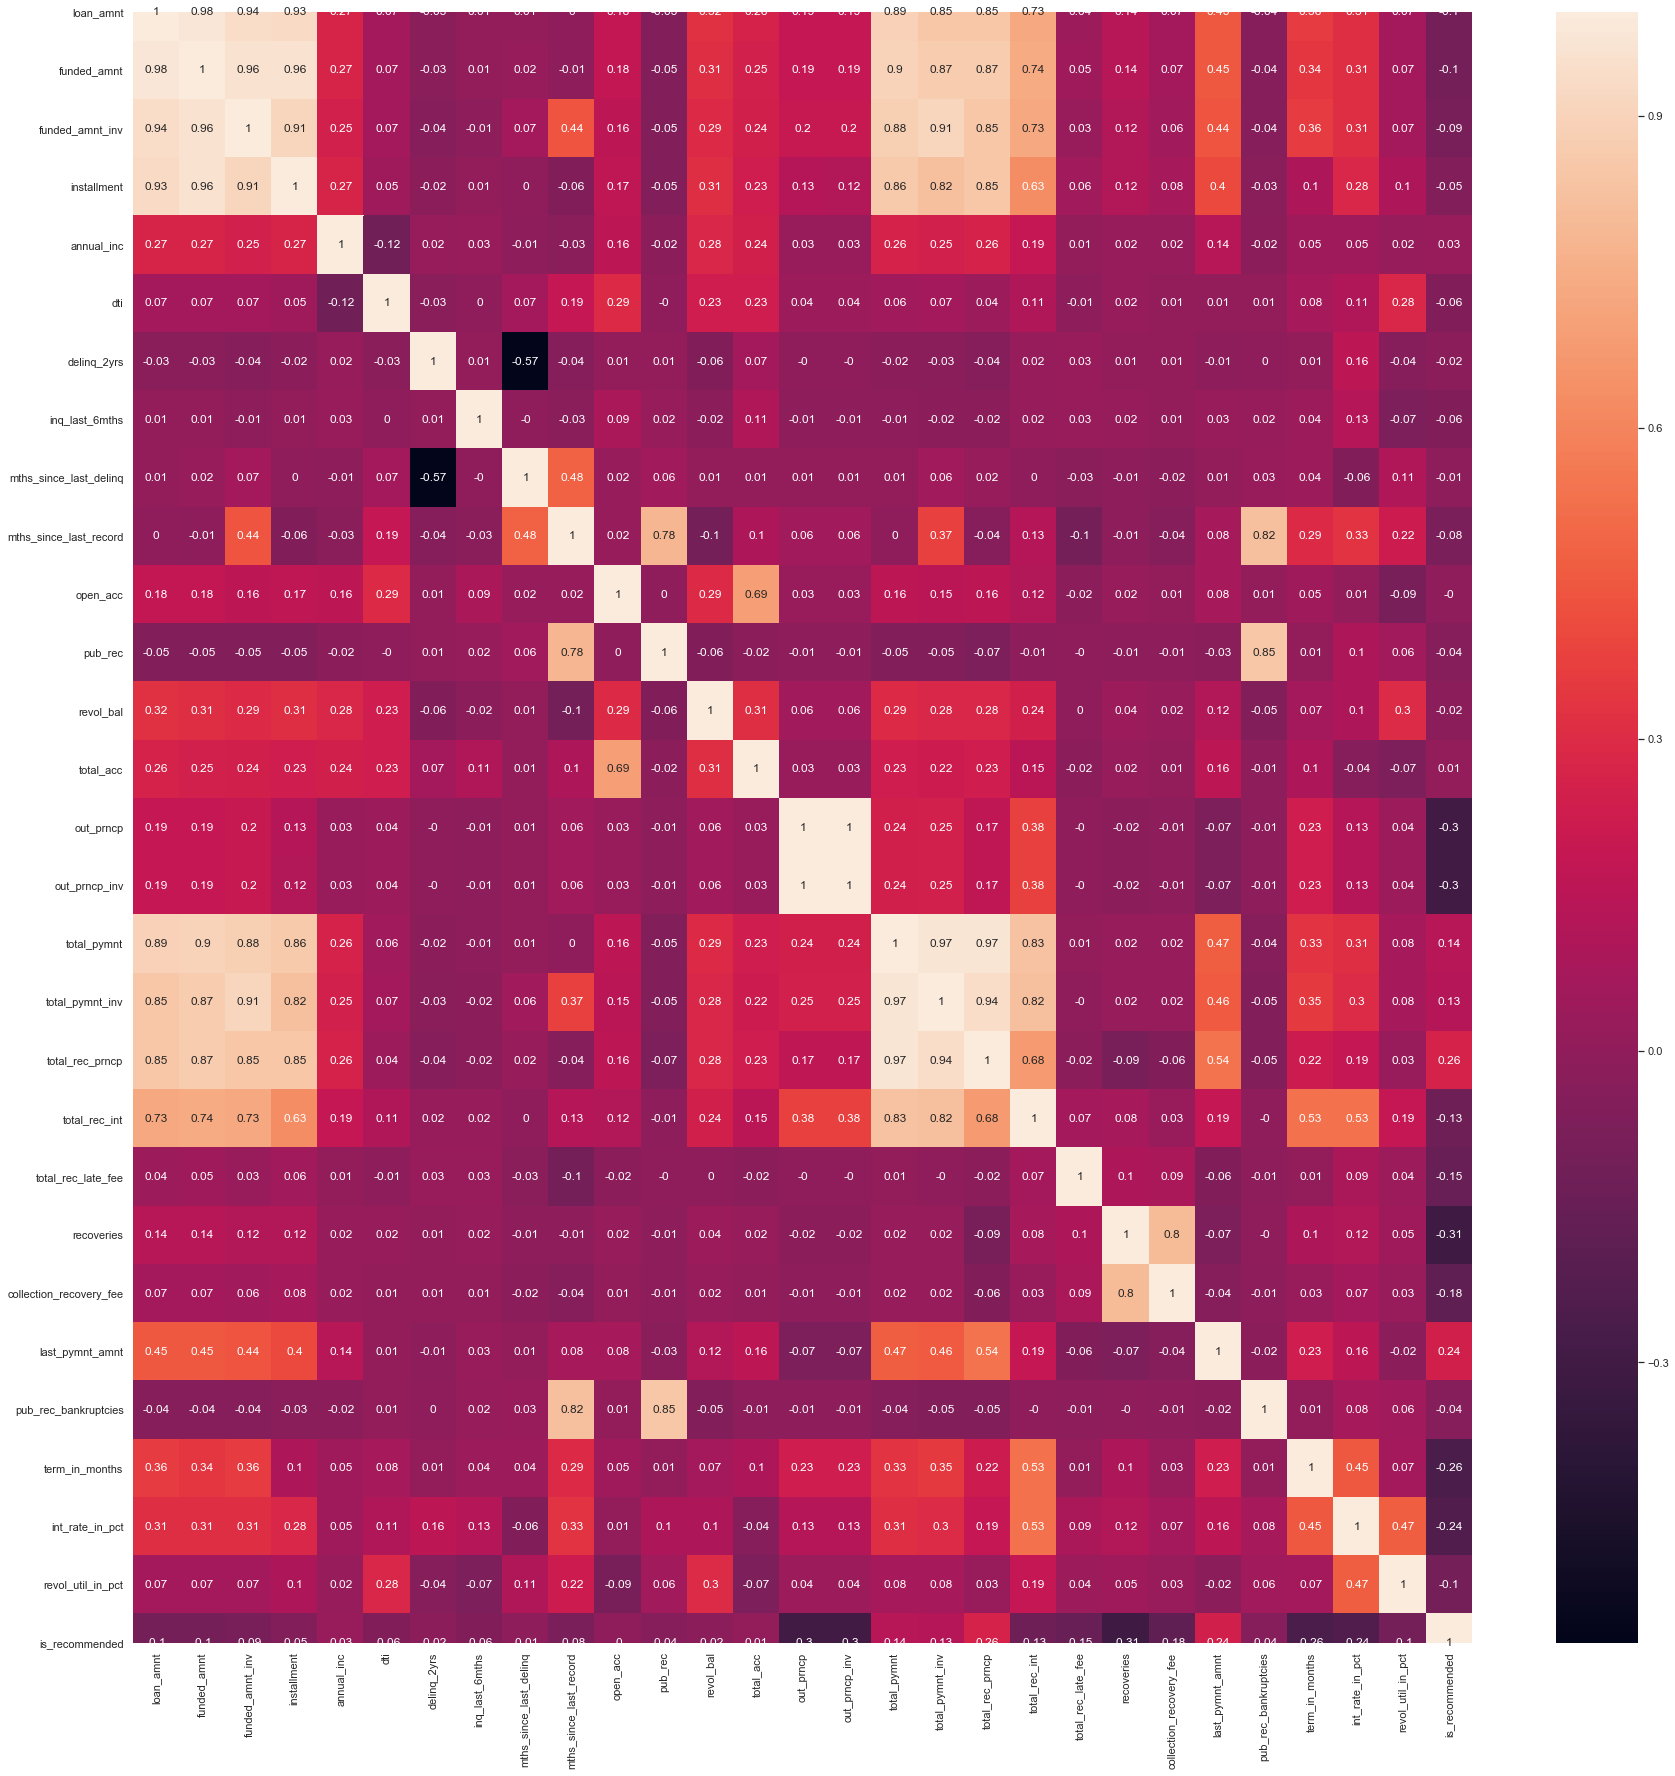

In [199]:
# As loan_status is a categorical variable, encoding it for getting correlation calculated
loan_df['is_recommended'] = loan_df['loan_status'].apply(lambda x : 1 if x =='Fully Paid' else 0)
corr = loan_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr.round(2), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()

Observations : 

    - Loan_status looks to be correlated with out_prncp, out_prcp_inv, Recoveries, term in months, interest rate in pct.
    On the basis of bsuiness, all of them makes sense as out_prncp, out_prcp_inv, Recoveries are a shadow attribute for loan_status, and Interest Rate seems to be a good predictor of loan_status.
  

## Bi-variate Analysis

In [216]:
# Calculate the Probability of charge off for every case
def bivariate_prob(df,col,stacked= True):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,[0,2]]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [148]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

### What is the loan amount distribution between Fully Paid and Charged Off ?

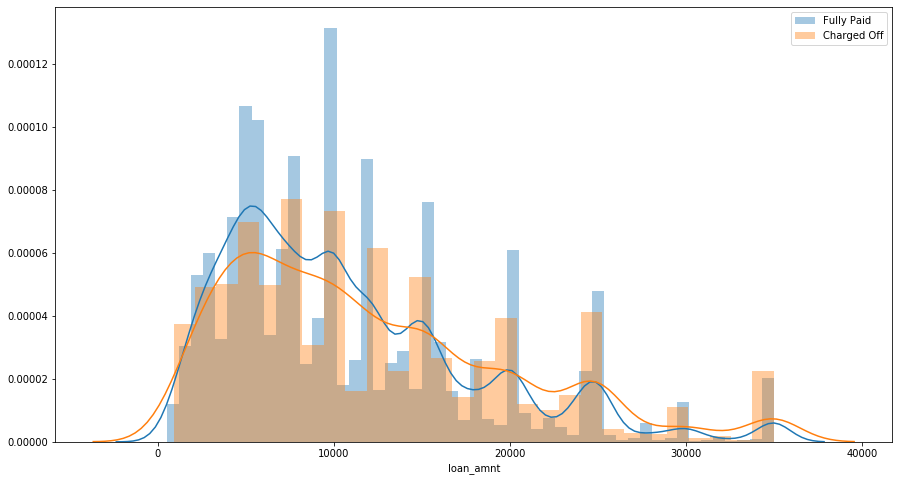

In [76]:
fix_plot_size()
sns.distplot(loan_df[loan_df.loan_status == 'Fully Paid']['loan_amnt'],label="Fully Paid")
sns.distplot(loan_df[loan_df.loan_status == 'Charged Off']['loan_amnt'],label="Charged Off")
plt.legend()
plt.show()

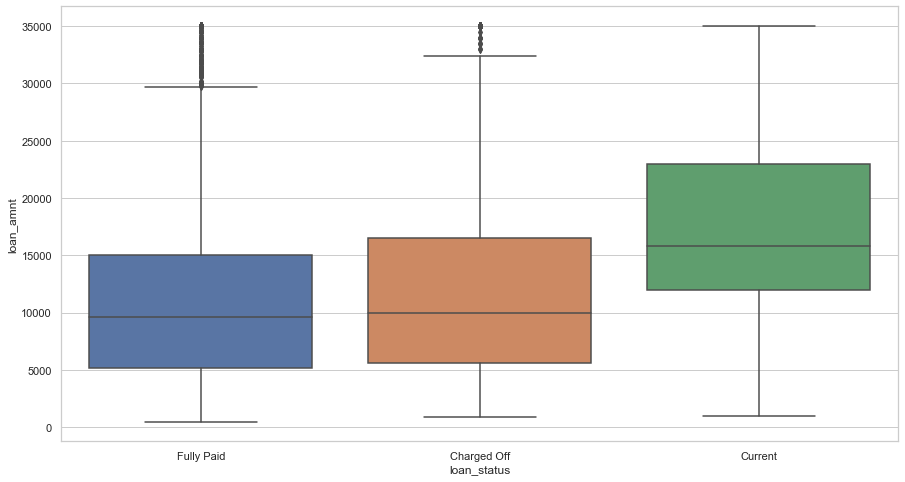

In [85]:
fix_plot_size()
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data=loan_df)

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.

### What is the term of loan between Fully Paid and Charged Off ?

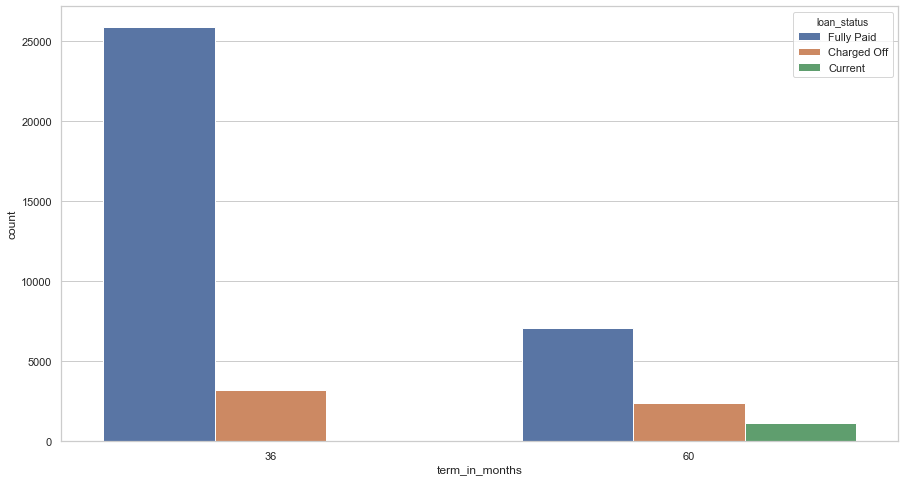

In [102]:
fix_plot_size()
sns.countplot(x = 'term_in_months',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
term_in_months,,,,,
36,3227,0,25869,29096,0.111
60,2400,1140,7081,10621,0.226


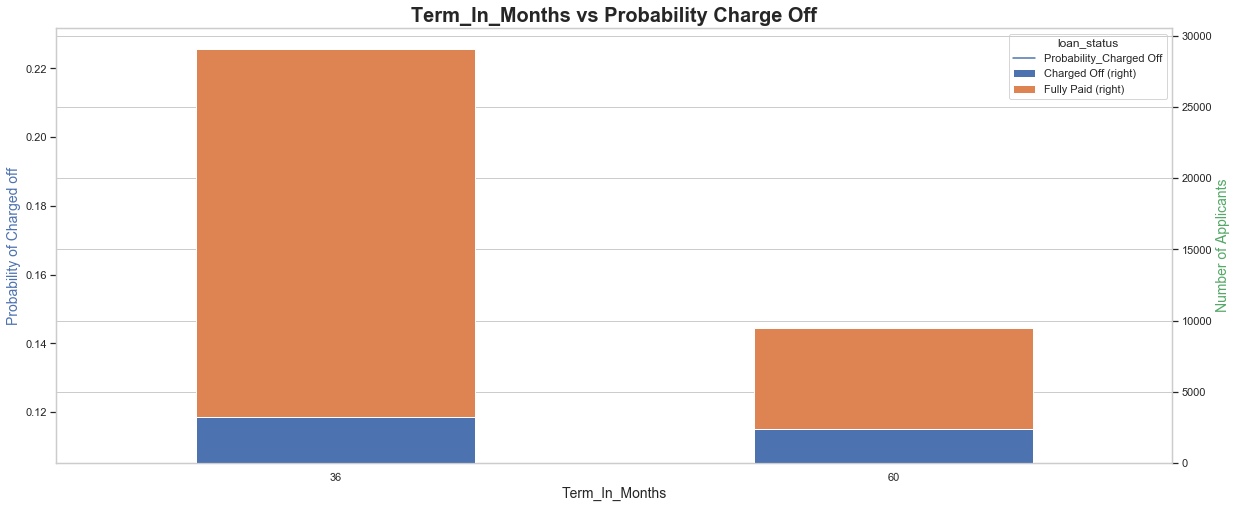

In [222]:
term = crosstab(loan_df,'term_in_months')
display(term)

bivariate_prob(df =loan_df,col ='term_in_months')

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.

### What is the average interest rate between Fully Paid and Charged Off ?

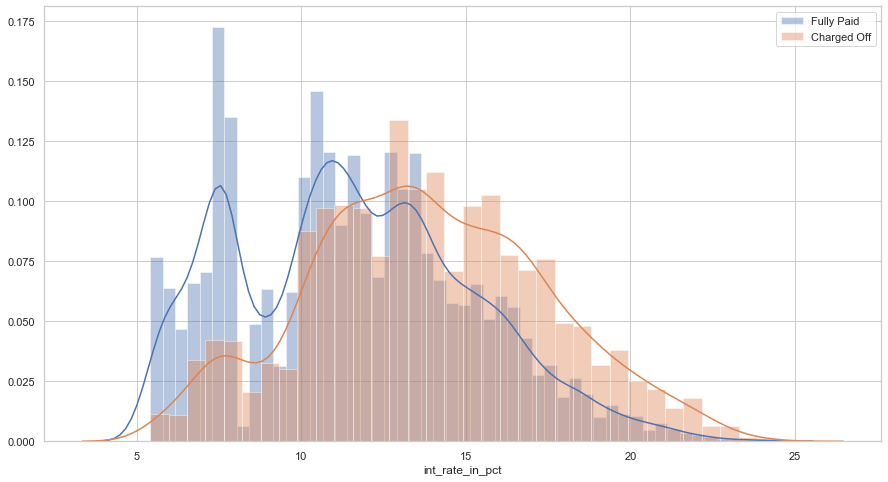

In [95]:
fix_plot_size()
sns.distplot(loan_df[loan_df.loan_status == 'Fully Paid']['int_rate_in_pct'],label="Fully Paid")
sns.distplot(loan_df[loan_df.loan_status == 'Charged Off']['int_rate_in_pct'],label="Charged Off")
plt.legend()
plt.show()

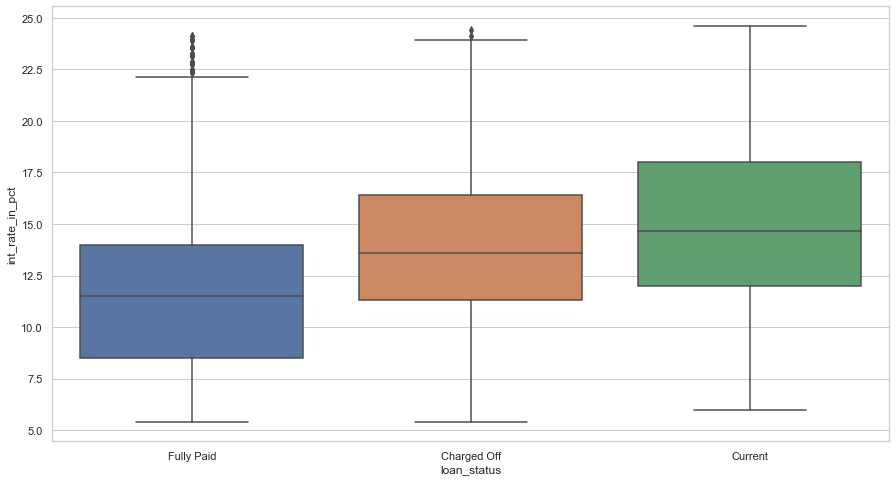

In [94]:
fix_plot_size()
sns.boxplot(x = 'loan_status', y = 'int_rate_in_pct', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,256,7,5114,5377,0.048
7.5-10,574,70,6372,7016,0.082
10-12.5,1232,270,8148,9650,0.128
12.5-15,1475,259,7410,9144,0.161
15 and above,1794,432,5432,7658,0.234


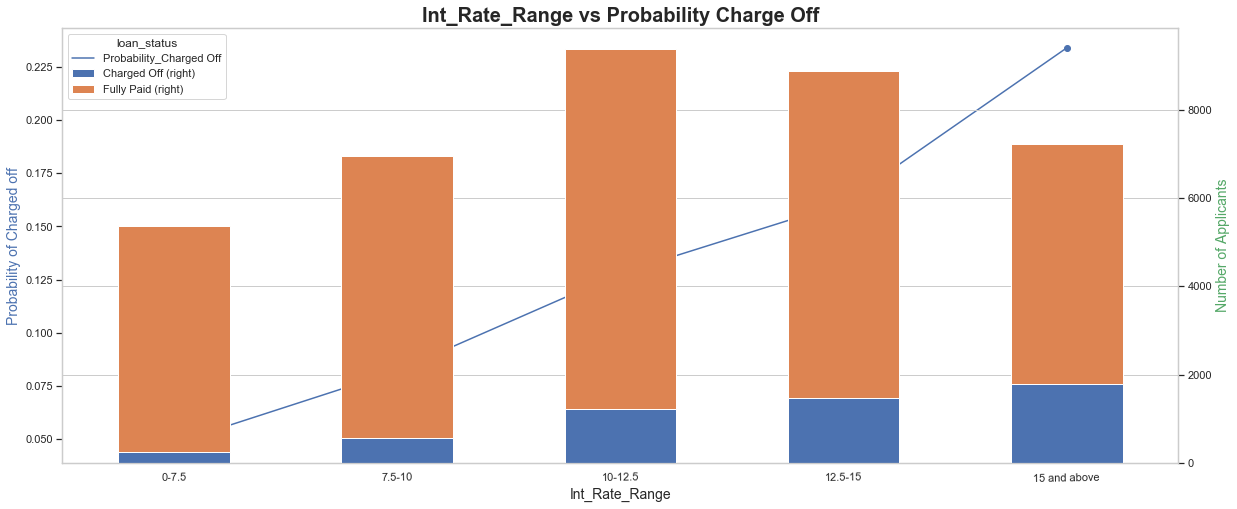

In [221]:
#Interest rate range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate_in_pct'], bins, labels=slot)

int_rate_range = crosstab(loan_df,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_df,col ='int_rate_range')

There seems to be a significant difference between Fully Paid and Charged Off based on the above plots. It tells us that more interest leads to increased chances of charging off the loan.

### What is the average number of installments between Fully Paid and Charged Off ?

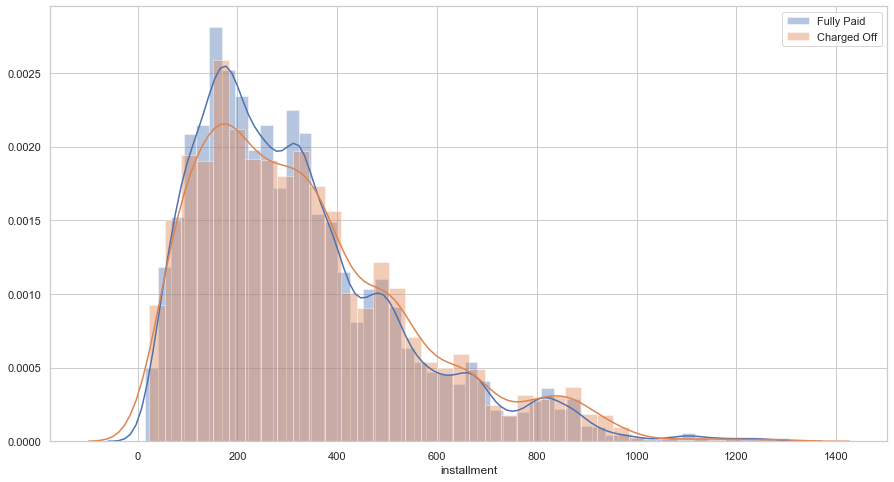

In [98]:
fix_plot_size()
sns.distplot(loan_df[loan_df.loan_status == 'Fully Paid']['installment'],label="Fully Paid")
sns.distplot(loan_df[loan_df.loan_status == 'Charged Off']['installment'],label="Charged Off")
plt.legend()
plt.show()

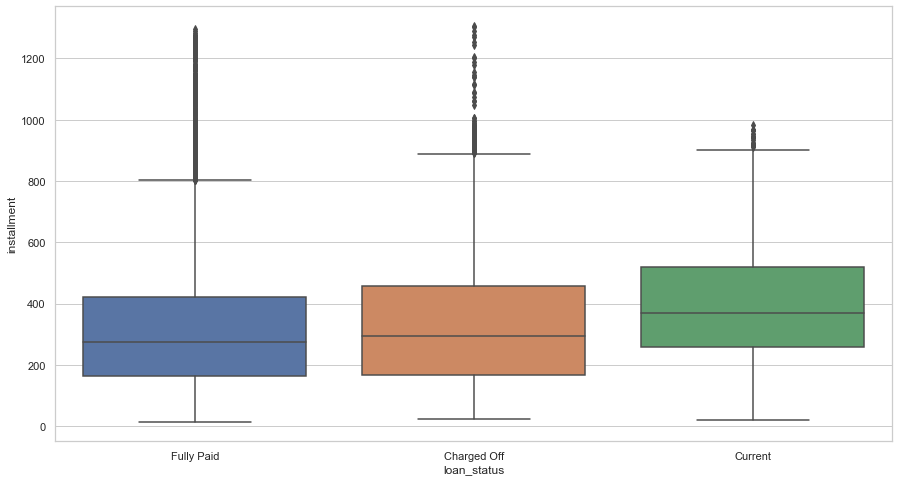

In [99]:
fix_plot_size()
sns.boxplot(x = 'loan_status', y = 'installment', data=loan_df)

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.

### What loan grade differs between Fully Paid and Charged Off ?

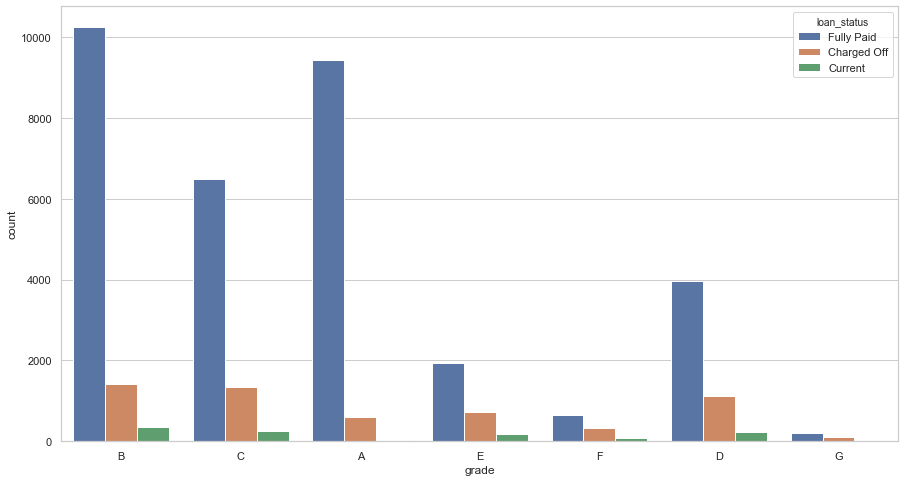

In [101]:
fix_plot_size()
sns.countplot(x = 'grade',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,602,40,9443,10085,0.060
B,1425,345,10250,12020,0.119
C,1347,264,6487,8098,0.166
D,1118,222,3967,5307,0.211
E,715,179,1948,2842,0.252
F,319,73,657,1049,0.304
G,101,17,198,316,0.320


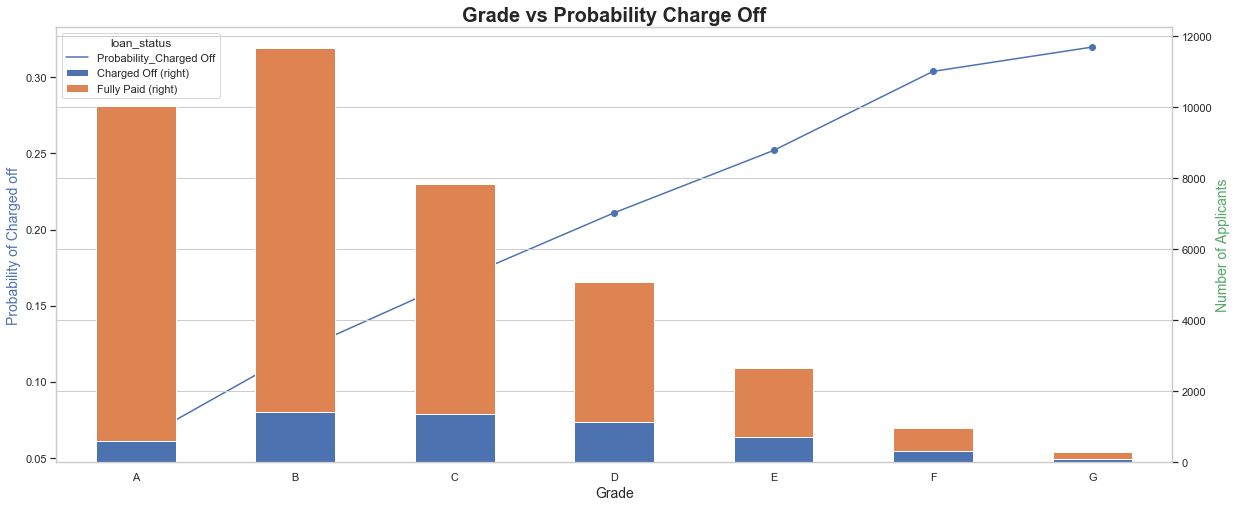

In [220]:
grade = crosstab(loan_df,'grade')
display(grade)

bivariate_prob(df =loan_df,col ='grade')

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots. But, Grade E, Grade F and Grade G has higher chance of charging off the loan.

### What sub-loan grade differs between Fully Paid and Charged Off ?

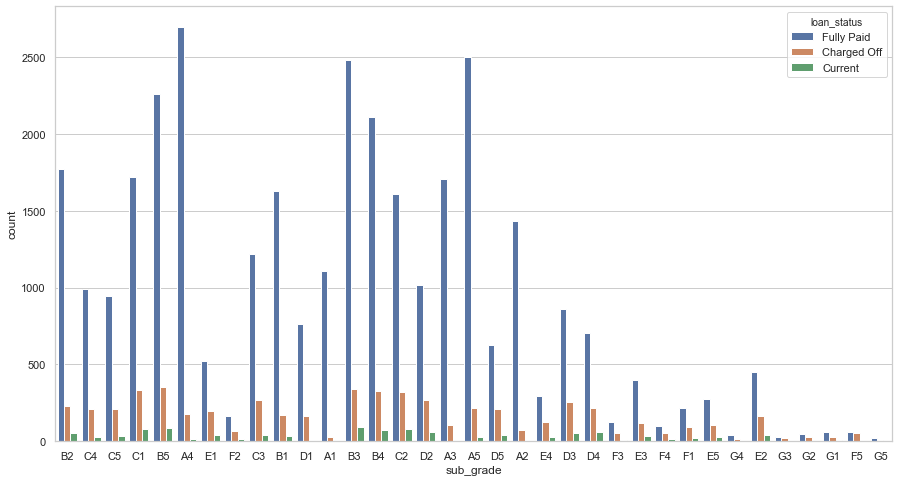

In [104]:
fix_plot_size()
sns.countplot(x = 'sub_grade',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
sub_grade,,,,,
A1,30,0,1109,1139,0.026
A2,74,0,1434,1508,0.049
A3,103,0,1707,1810,0.057
A4,178,13,2695,2886,0.062
A5,217,27,2498,2742,0.079
B1,171,33,1626,1830,0.093
B2,228,56,1773,2057,0.111
B3,341,92,2484,2917,0.117
B4,329,75,2108,2512,0.131


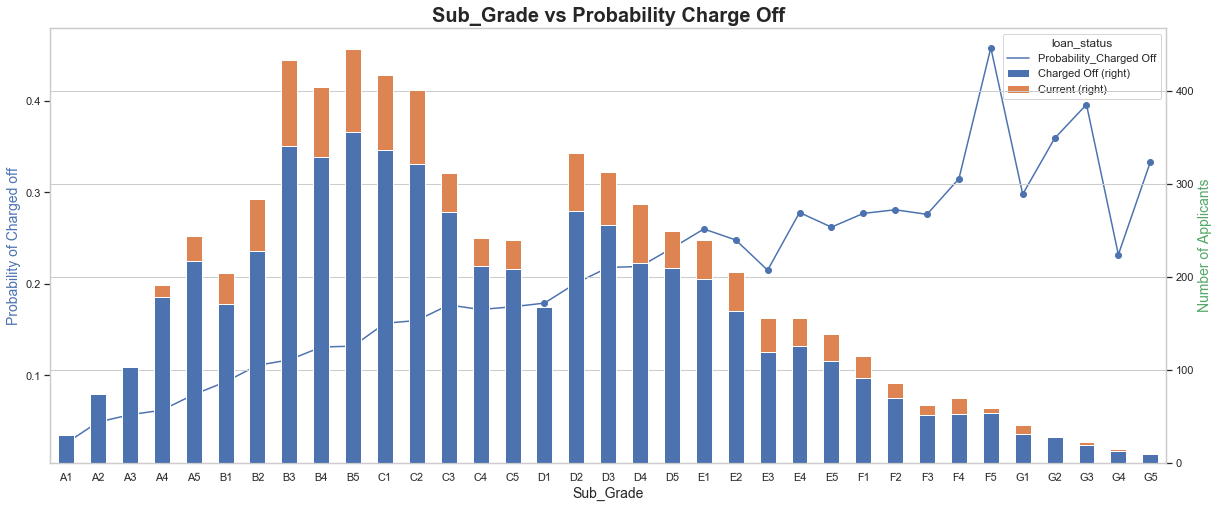

In [166]:
sub_grade = crosstab(loan_df,'sub_grade')
display(sub_grade)
bivariate_prob(df =loan_df,col ='sub_grade')

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots. But, Sub-grade F5 has the highest chances of charging off the loan

### Which bin of Employment Duration has highest number of Charged Off?

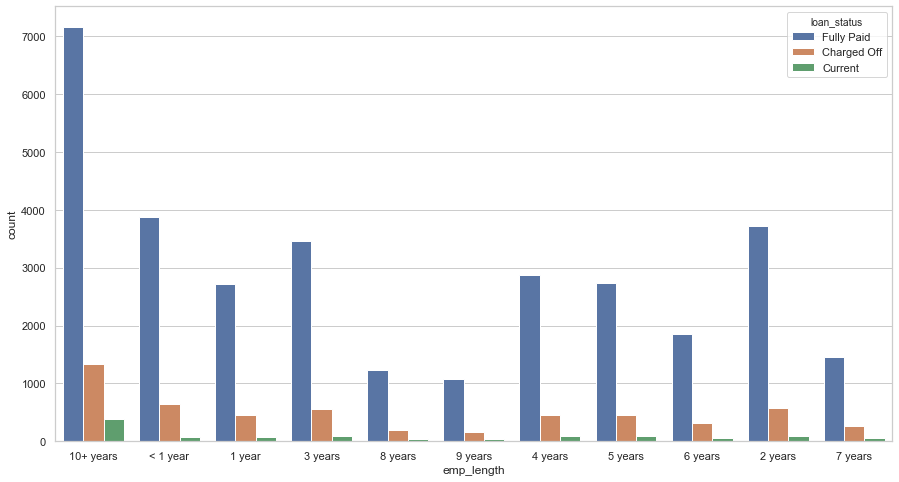

In [109]:
fix_plot_size()
sns.countplot(x = 'emp_length',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
1 year,456,71,2713,3240,0.141
10+ years,1331,391,7157,8879,0.150
2 years,567,97,3724,4388,0.129
3 years,555,83,3457,4095,0.136
4 years,462,94,2880,3436,0.134
5 years,458,88,2736,3282,0.140
6 years,307,61,1861,2229,0.138
7 years,263,62,1448,1773,0.148
8 years,203,44,1232,1479,0.137


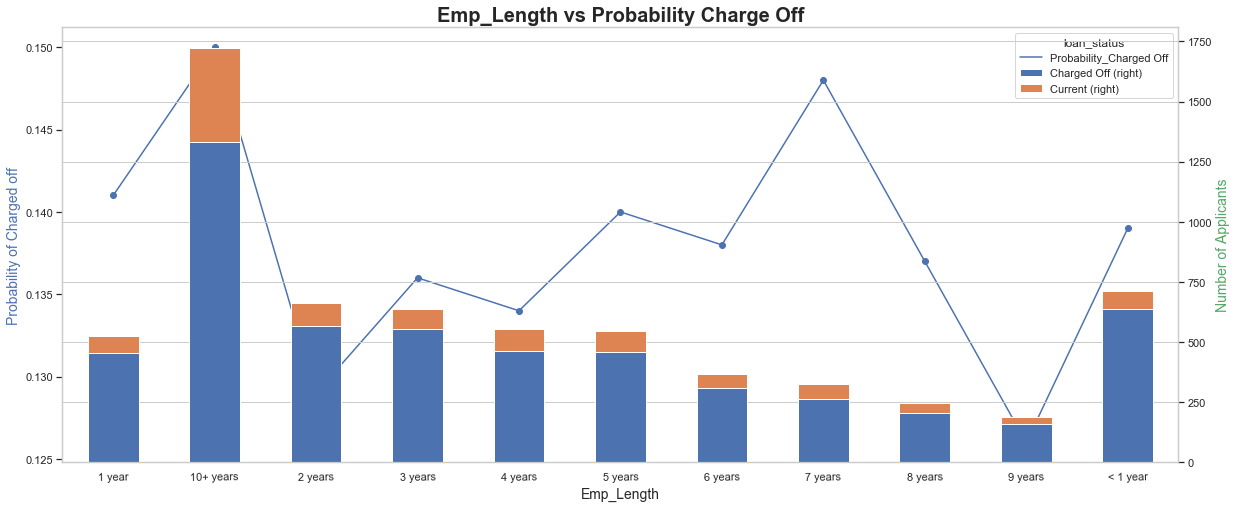

In [171]:
emp_length = crosstab(loan_df,'emp_length')
display(emp_length)

bivariate_prob(df =loan_df,col ='emp_length')

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.

### Does Home Ownership Status affect loan status ?

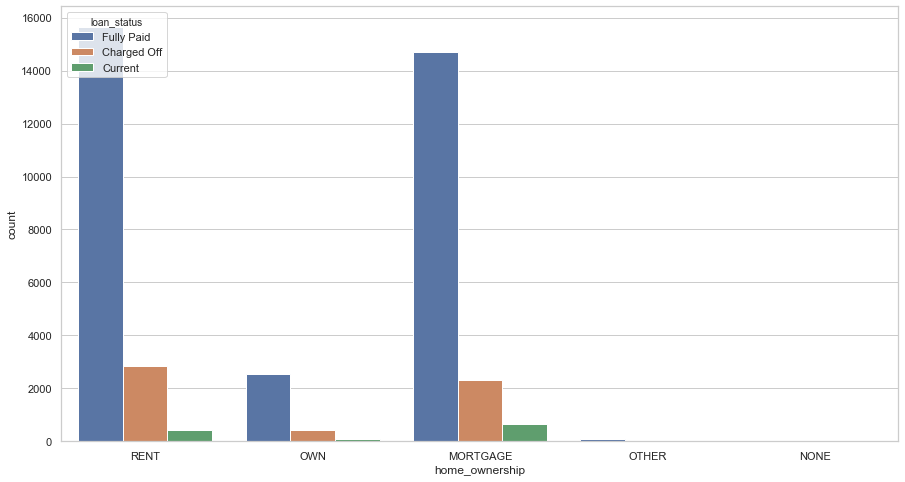

In [111]:
fix_plot_size()
sns.countplot(x = 'home_ownership',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
home_ownership,,,,,
MORTGAGE,2327,638,14694,17659,0.132
NONE,0,0,3,3,0.000
OTHER,18,0,80,98,0.184
OWN,443,83,2532,3058,0.145
RENT,2839,419,15641,18899,0.150


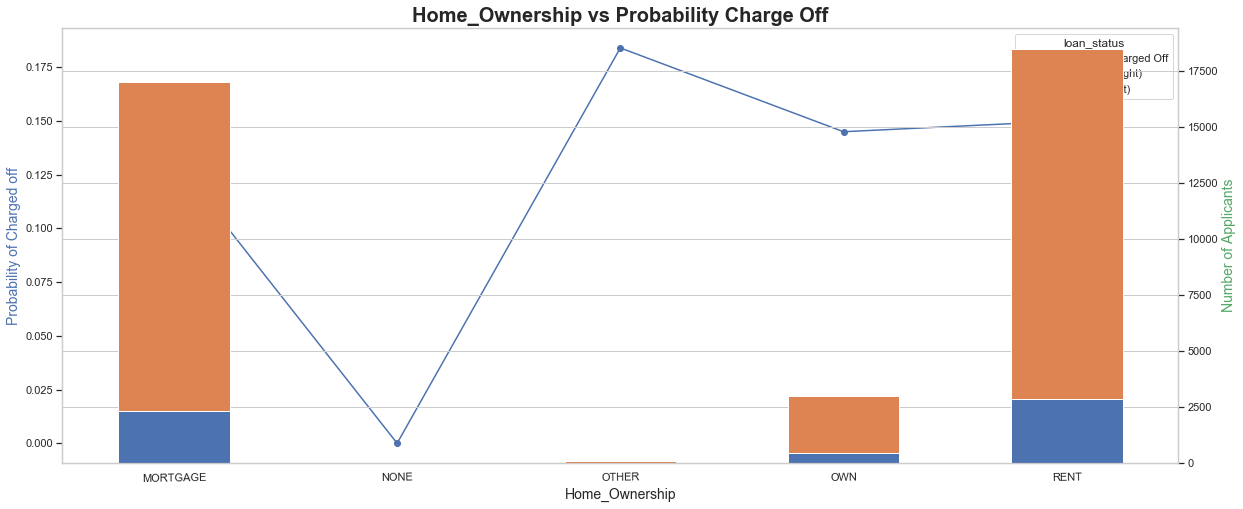

In [219]:
home_ownership = crosstab(loan_df,'home_ownership')
display(home_ownership)

bivariate_prob(df =loan_df,col ='home_ownership')

- There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots. 
- Having a own house reduces the chances of charging off the loan

### Does Annual Income affect loan status ?

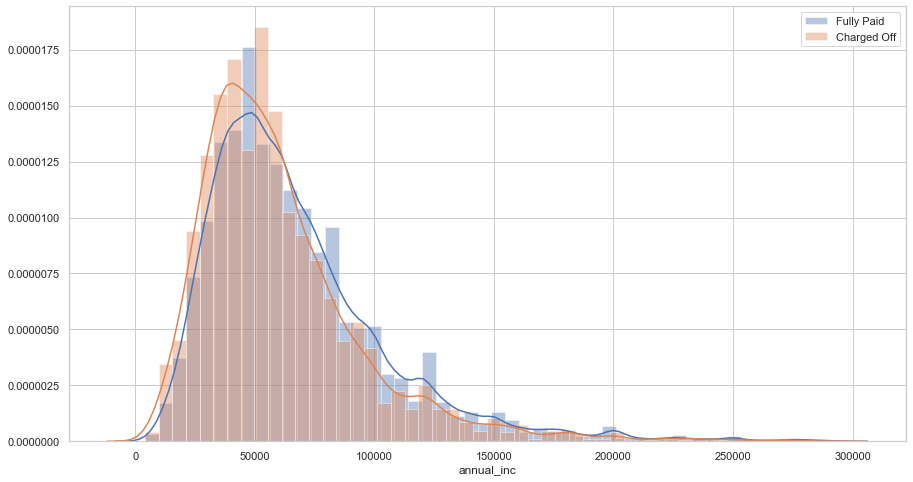

In [135]:
fix_plot_size()
sns.distplot(loan_df[loan_df.loan_status == 'Fully Paid'].query('annual_inc < 300000')['annual_inc'],label="Fully Paid")
sns.distplot(loan_df[loan_df.loan_status == 'Charged Off'].query('annual_inc < 300000')['annual_inc'],label="Charged Off")
plt.legend()
plt.show()

There seems to be not much significant difference between Fully Paid and Charged Off.But, based on the above plots. But, based on the plot, average annual income of Charged off customers are lower than fully paid.

### Does Verification Status provide info on Loan Status ? 

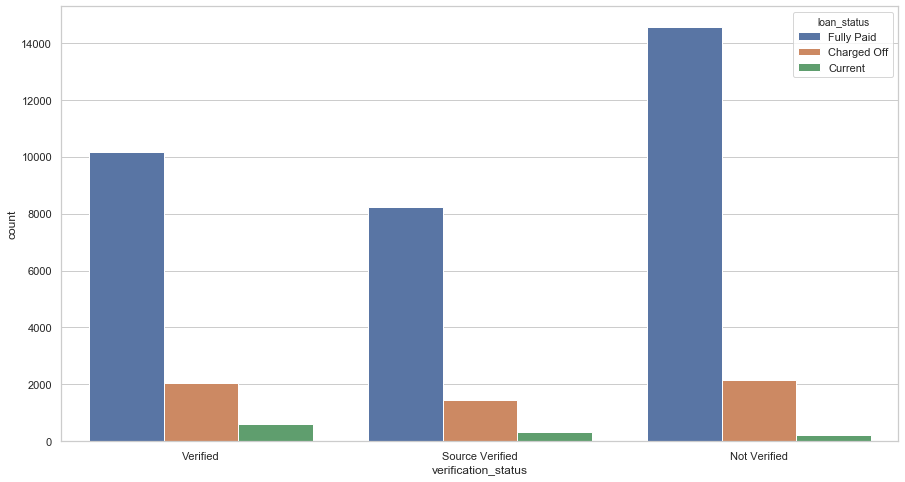

In [136]:
fix_plot_size()
sns.countplot(x = 'verification_status',hue = 'loan_status', data=loan_df)

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.

### Which Purpose of loan has the highest Charged Off ? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

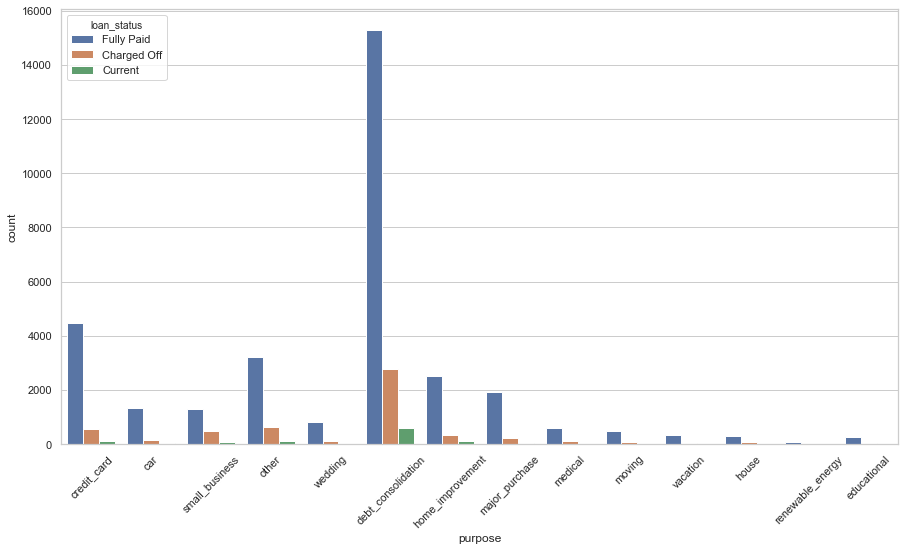

In [138]:
fix_plot_size()
sns.countplot(x = 'purpose',hue = 'loan_status', data=loan_df)
plt.xticks(rotation = 45)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,160,50,1339,1549,0.103
credit_card,542,103,4485,5130,0.106
debt_consolidation,2767,586,15288,18641,0.148
educational,56,0,269,325,0.172
home_improvement,347,101,2528,2976,0.117
house,59,14,308,381,0.155
major_purchase,222,37,1928,2187,0.102
medical,106,12,575,693,0.153
moving,92,7,484,583,0.158


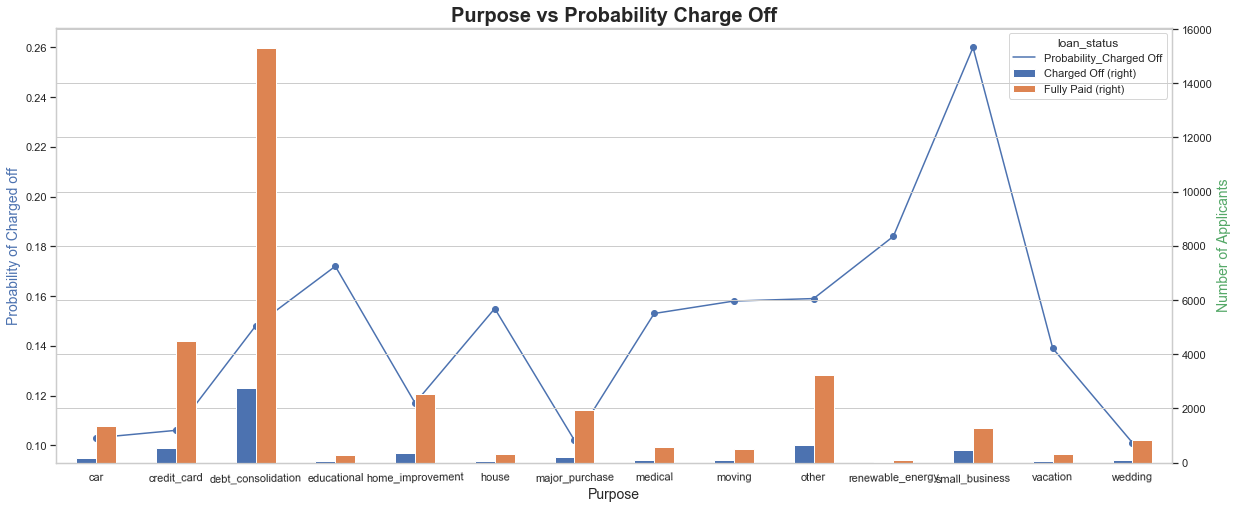

In [218]:
purpose = crosstab(loan_df,'purpose')
display(purpose)

bivariate_prob(df =loan_df,col ='purpose',stacked=False)

- There seems to be some significant difference between Fully Paid and Charged Off based on the above plots.
- Borrowers lending for Debt_Consolidation, Paying Credit Card Bills, Home Improvement and for small business purpose have more chances of charging off the loan

### Which State has the highest Charged Off ?

In [143]:
df = loan_df[loan_df.loan_status == "Charged Off"]
df = pd.DataFrame(df.groupby('addr_state').addr_state.count()).rename({'addr_state':'freq'}, axis = 1).reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=df['addr_state'], # Spatial coordinates
    z = df['freq'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of Loans Charged Off",
))

fig.update_layout(
    title_text = 'Loans being Charged Off from Lending Club',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
AK,15,2,63,80,0.188
AL,54,17,381,452,0.119
AR,27,10,208,245,0.110
AZ,123,30,726,879,0.140
CA,1125,150,5824,7099,0.158
CO,98,26,668,792,0.124
CT,94,25,632,751,0.125
DC,15,3,196,214,0.070
DE,12,1,101,114,0.105


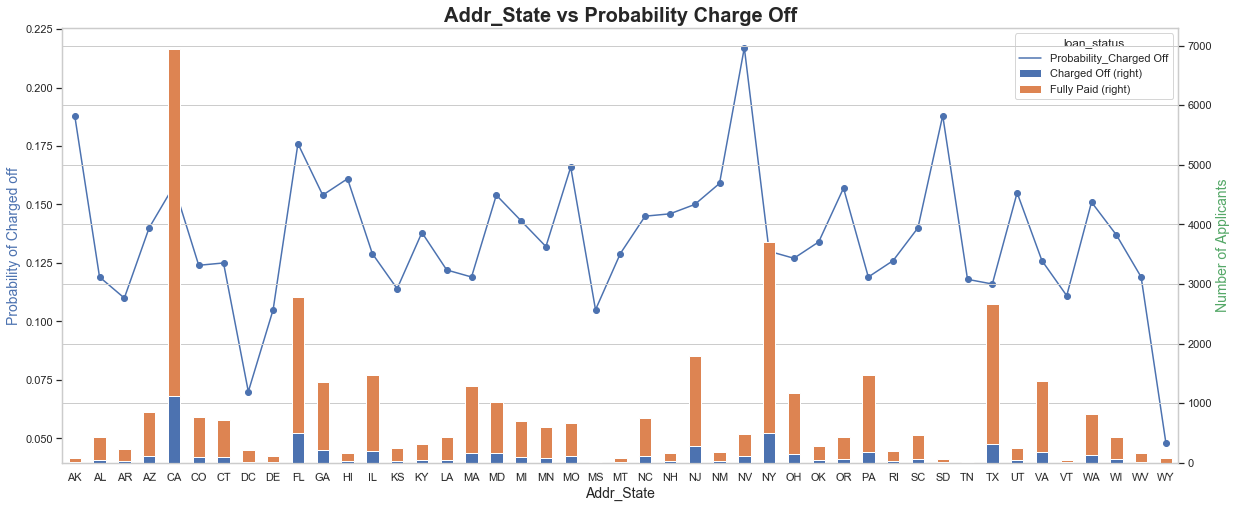

In [217]:
filter_states = loan_df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]
loan_filter_states = loan_df.drop(labels = loan_df[loan_df.addr_state.isin(filter_states.index)].index)
states = crosstab(loan_filter_states,'addr_state')
display(states.head(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

In [163]:
fig = go.Figure(data=go.Choropleth(
    locations=states.reset_index()['addr_state'], # Spatial coordinates
    z = states.reset_index()['Probability_Charged Off'].astype(float),# Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of Loans Charged Off",
))

fig.update_layout(
    title_text = 'Loans being Charged Off from Lending Club',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

- There seems to be some significant difference between Fully Paid and Charged Off based on the above plots.
- Borrowers from Nevada, Florida, Alaska and South Dakota have more chances of charging off.

### Does DTI affect Chances of Charge Off ?

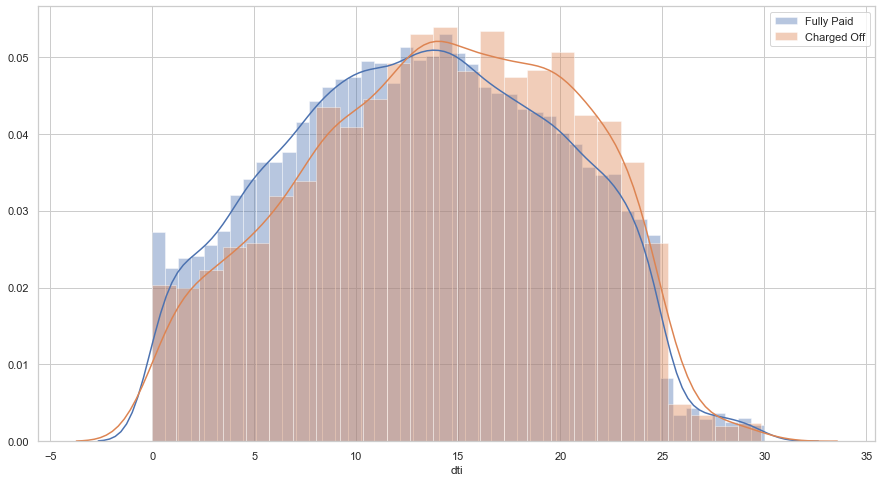

In [225]:
fix_plot_size()
sns.distplot(loan_df[loan_df.loan_status == 'Fully Paid']['dti'],label="Fully Paid")
sns.distplot(loan_df[loan_df.loan_status == 'Charged Off']['dti'],label="Charged Off")
plt.legend()
plt.show()

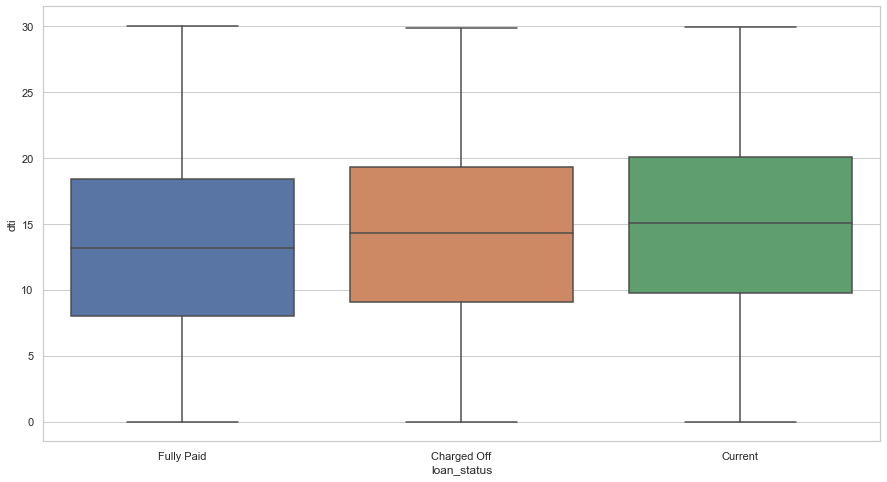

In [226]:
fix_plot_size()
sns.boxplot(x = 'loan_status', y = 'dti', data=loan_df)

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots.But, borrowers with higher DTI have more chances of charging off the loan.

### Does delinq_2yrs affect chances of Charge Off ?

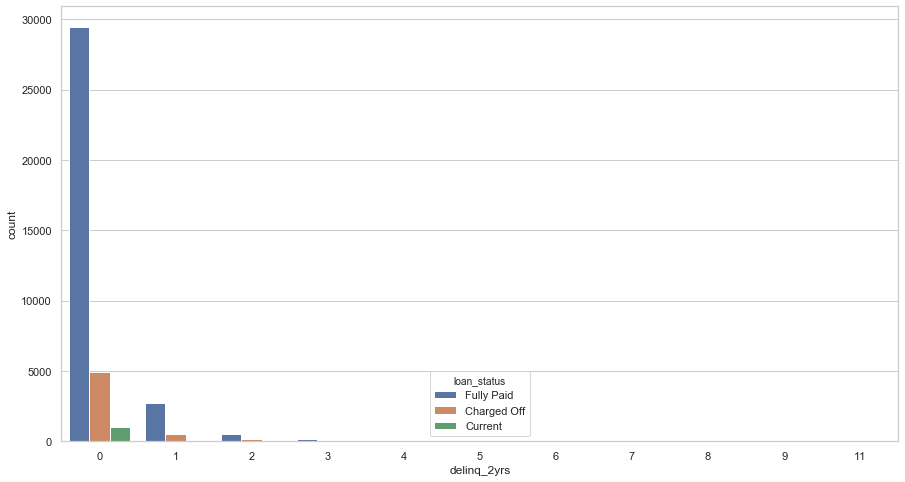

In [228]:
fix_plot_size()
sns.countplot(x = 'delinq_2yrs',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
delinq_2yrs,,,,,
0,4936,1019,29450,35405,0.139
1,507,96,2700,3303,0.153
2,130,14,543,687,0.189
3,35,8,177,220,0.159
4,13,2,47,62,0.210
5,3,1,18,22,0.136
6,1,0,9,10,0.100
7,1,0,3,4,0.250
8,1,0,1,2,0.500


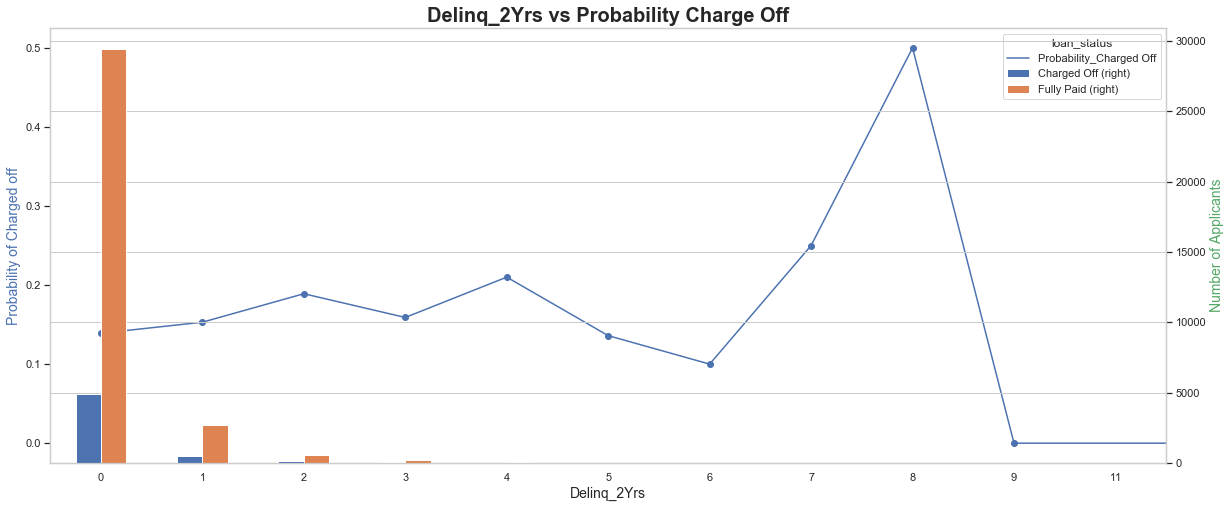

In [229]:
purpose = crosstab(loan_df,'delinq_2yrs')
display(purpose)

bivariate_prob(df =loan_df,col ='delinq_2yrs',stacked=False)

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots. 

### Does Employee title impact chances of Charging Off ?

In [254]:
title_mask = loan_df['emp_title'].value_counts().sort_values(ascending = False).index.values[:20]
cm = sns.light_palette("green", as_cmap=True)

round(pd.crosstab(loan_df[loan_df['emp_title'].isin(title_mask)]['emp_title'], 
                  loan_df[loan_df['emp_title'].isin(title_mask)]['loan_status'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
emp_title,,,
AT&T,20.34,3.39,76.27
Bank of America,18.35,1.83,79.82
IBM,13.64,1.52,84.85
JP Morgan Chase,16.22,5.41,78.38
Kaiser Permanente,14.29,0,85.71
Lockheed Martin,4.55,4.55,90.91
Self Employed,12.5,0,87.5
State of California,9.52,11.9,78.57
U.S. Army,19.51,2.44,78.05


Borrwers having Employee Title has walmart have higher chances of Charging Off.

### Does pub_rec_bankruptcies impact chances of Charging Off ?

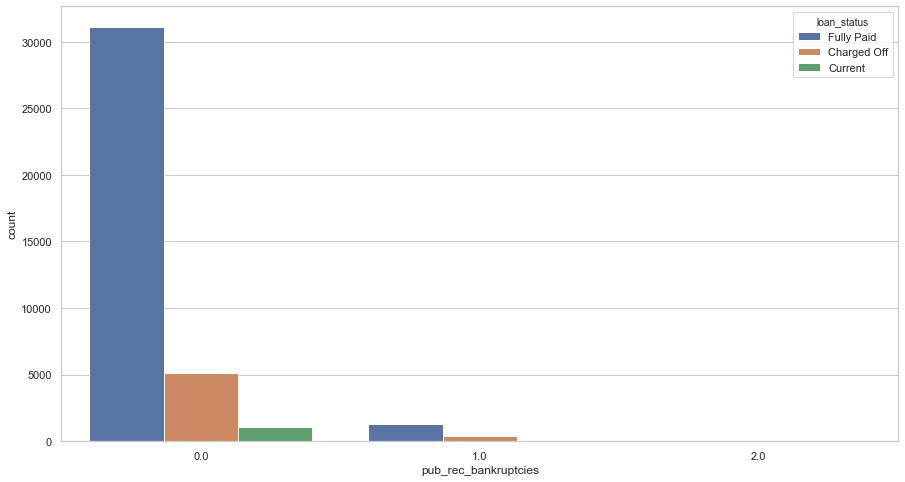

In [255]:
fix_plot_size()
sns.countplot(x = 'pub_rec_bankruptcies',hue = 'loan_status', data=loan_df)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
pub_rec_bankruptcies,,,,,
0.0,5141,1101,31097,37339,0.138
1.0,366,37,1271,1674,0.219
2.0,2,2,3,7,0.286


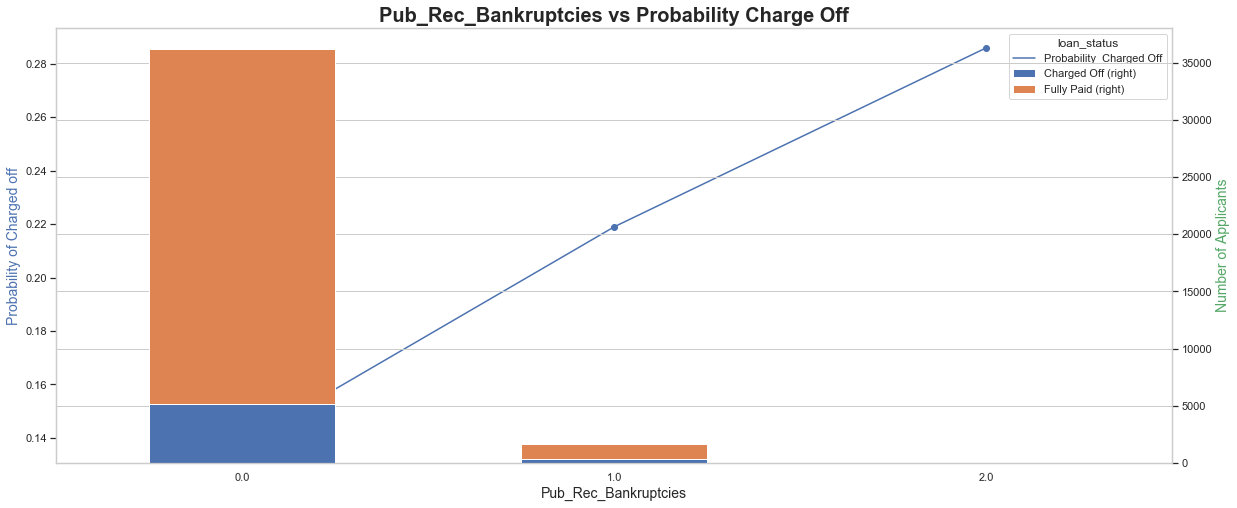

In [256]:
pub_rec_bankruptcies = crosstab(loan_df,'pub_rec_bankruptcies')
display(pub_rec_bankruptcies)

bivariate_prob(df =loan_df,col ='pub_rec_bankruptcies')

There seems to be not much significant difference between Fully Paid and Charged Off based on the above plots. 